In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sa
import urllib
from logging import exception

In [99]:
parameters = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                                    "Server=WIN-SERVIDOR-BD\DWGRUPOTOTAL;"
                                    "DATABASE=DW_Central;"
                                    "UID=sa;"
                                    "PWD=DWpln21")                    

In [100]:
engine_sql = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(parameters))

In [12]:
datos = pd.read_sql("select * from CoordenadasMasuno", con=engine_sql)
df = pd.DataFrame(datos)

In [20]:
df.columns

Index(['Fecha', 'COD_DISTRI', 'COD_CLIENTE', 'Vendedor', 'Es Valido',
       'Fecha Checkin', 'Fecha Checkout', 'Mot. Invalidez CI',
       'Mot. Invalidez CO', 'Coordenadas CI Y', 'Coordenadas CI X',
       'Coordenadas CO Y', 'Coordenadas CO X'],
      dtype='object')

**COMENZAMOS A PROBAR EXTRAER INFO USANDO MATPLOT Y SEABORN**

In [14]:
muestra = np.unique(df.Vendedor, return_counts=True)

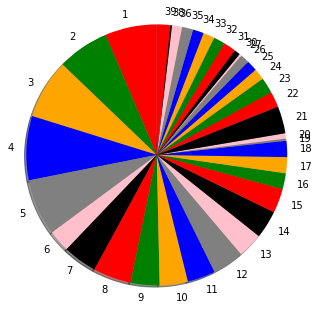

In [18]:
plt.pie(x= muestra[1],
        labels= muestra[0],
        radius= 1.5,
        colors=["red","green","orange","blue","gray","pink","black"],
        startangle= 90,
        shadow=True)
plt.show()

**NUEVO TIPO DE GRAFICO DE BURBUJAS**

In [102]:
datos2 = pd.read_sql("""select * from VisitasMasuno where CodigoDistribuidor=70425 and Fecha='2022-08-01 00:00:00.000';""", con=engine_sql)
df2 = pd.DataFrame(datos2)
np.random.seed(0)
df_sample = df2.sample(frac=1).head(1000)

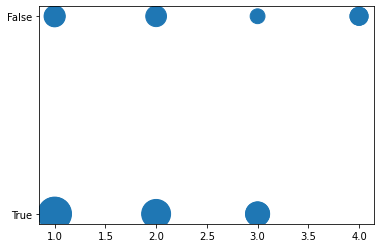

In [103]:
plt.scatter(x=df_sample.CodigoVendedor, y=df_sample.IsVisitValid, s=df_sample.VisitDuration)

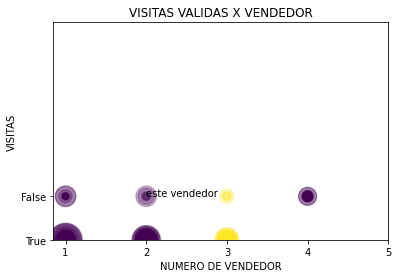

In [104]:
plt.scatter(x=df_sample.CodigoVendedor, y=df_sample.IsVisitValid, 
            s=df_sample.VisitDuration, alpha= .3,
            c=df_sample.CodigoVendedor.isin([3])
            )
plt.title("VISITAS VALIDAS X VENDEDOR")
plt.xlabel('NUMERO DE VENDEDOR')
plt.ylabel('VISITAS')
plt.ylim([0,5])
plt.xticks([1,2,3,4,5])
plt.text(x=2, y=1, s="este vendedor")
plt.show()             

**PERSONALIZANDO GRAFICOS**

In [108]:
data = np.unique(df_sample.CodigoVendedor, return_counts=True)
labs = ['Vend_1', 'Vend_2', 'Vend_3', 'Vend_4']


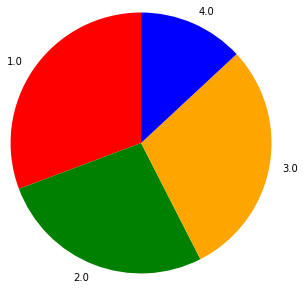

In [109]:
plt.pie(x= data[1],
        labels=data[0],
        radius=1.5,
        colors=['Red','green','orange','blue','gray'],
        startangle= 90
        )
plt.show()

Mejoramos la estetica del grafico

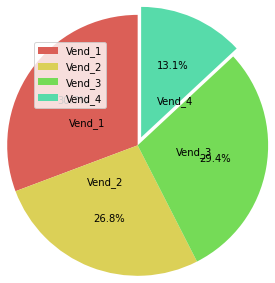

In [111]:
plt.pie(x= data[1],
        labels=labs,
        radius=1.5,
        colors=sns.color_palette('hls',7),
        explode= (0,0,0,0.1),
        startangle= 90,
        autopct= "%1.1f%%",
        labeldistance= 0.3
        )
# plt.legend(loc="best",labels=labs)
plt.legend(loc="upper left",labels=labs)
plt.show()

[Text(0.5, 0, 'Vendedores'), Text(0, 0.5, 'Visitas')]

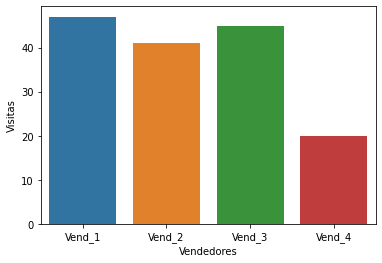

In [112]:
plt = sns.barplot(x= labs, y= data[1])
plt.set(xlabel='Vendedores', ylabel='Visitas')

**GRAFICOS DE SERIES TEMPORALES**

In [ ]:
df_sample